In [1]:
!pip install -U ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/18/8e/87cf91492cd6b5a0d71735b69658f34841d426fc5b148656cd3a5768a470/ultralytics-8.3.61-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/906.9 kB ? eta -:--:--
   -- ------------------------------------- 61.4/906.9 kB 1.1 MB/s eta 0:00:01
   ------- -------------------------------- 174.1/906.9 kB 1.8 MB/s eta 0:00:01
   -------------- ------------------------- 337.9/906.9 kB 1.9 MB/s eta 0:00:01
   -------------------------- ------------- 593.9/906.9 kB 2.9 MB/s eta 0:00:01
   ------------------------------------ --- 819.2/906.9 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 906.9/906.9 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.11
    Uninstalling ultralytics-8.3.11:
      Successfully uninstalled ultralytics-8.3.11


In [1]:
from ultralytics import SAM

# Define an inference source
source = "C:/Users/dnnxl/Downloads/frame_00002.png"

# Load a model
model = SAM('sam2.1_t.pt')

# Run inference on an image
#everything_results = model(source, device="cpu", retina_masks=True, imgsz=1024, conf=0.4, iou=0.9, save=True)

# Run inference with bboxes and points and texts prompt at the same time
results = model(source, conf=0.01)

100%|██████████| 74.5M/74.5M [00:03<00:00, 21.8MB/s]


c:\Users\dnnxl\anaconda3\envs\sam-pinas-dev\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


image 1/1 C:\Users\dnnxl\Downloads\frame_00002.png: 1024x1024 1 0, 1 1, 292216.8ms
Speed: 130.3ms preprocess, 292216.8ms inference, 39.8ms postprocess per image at shape (1, 3, 1024, 1024)


In [2]:
bounding_boxes = results[0].boxes.xyxy.data.numpy()

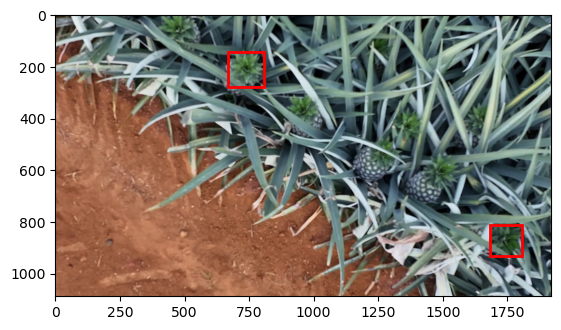

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a blank white image
image = cv2.imread("C:/Users/dnnxl/Downloads/frame_00002.png")  # Load your image here
if image is None:
    image = 255 * np.ones((1200, 1920, 3), dtype=np.uint8)  # Fallback to a blank white image

# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib

# Plot each bounding box
for box in bounding_boxes:
    x_min, y_min, x_max, y_max = box
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Display the image with bounding boxes
plt.show()